# PCA method analysis

In [1]:
include("/Net/Groups/BGI/people/gkraemer/progs/data_cube/julia/notebooks/stuff.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10662782209024568892\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5807662024945385996\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/user/gkraemer//assetserver/549eec07f928a744cd5cefcd9652eb9af414188d-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-10662782209024568892\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Warning: RCall.jl: Loading required package: sp
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Checking rgeos availability: TRUE
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Loading required package: zoo
│ 
│ Attaching package: 'zoo'
│ 
│ The following objects are masked from 'package:base':
│ 
│     as.Date, as.Date.numeric
│ 
│ Loading required package: sandwich
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packag

PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 

In [2]:
cube_z_trans = load(joinpath(cubes_base_dir, "z_trans_pca.jld2"), "z_trans")
cube_pca = load(joinpath(cubes_base_dir, "z_trans_pca.jld2"), "pca")
cube_pca_online = loadCube(joinpath(cubes_base_dir, "cube_pca_online"))
pca_no_msc_cube = loadCube(joinpath(cubes_base_dir, "pca_no_msc_cube"))
pca_msc_cube = loadCube(joinpath(cubes_base_dir, "pca_msc_cube"))


Memory mapped cube with the following dimensions
MSC                 Axis with 46 Elements from 1900-01-01 to 1900-12-27
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 2.67 GB


In [3]:
using ESDLPlots

In [4]:
cube_base = getCubeData(Cube(data_cube_dir), variable = vars, time = (Date("2001-01-01"), Date("2011-12-31")))

Data Cube view with the following dimensions
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Time                Axis with 506 Elements from 2001-01-01 to 2011-12-27
Variable            Axis with 12 elements: black_sky_albedo evaporation .. terrestrial_ecosystem_respiration white_sky_albedo 
Total size: 29.32 GB


In [5]:
plotTS(cube_base)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any["Group", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:value_label=>"None",:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")))], Dict{Symbol,Any}(:className=>"select "))], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"None","val"=>1,"id"=>"idr0GEHtsn"), OrderedCollections.OrderedDict{String,Any}("key"=>"Lon","val"=>2,"id"=>"idjee7g19d"), OrderedCollections.OrderedDict{String,Any}("key"=>"Lat","val"=>3,"id"=>"idIhYlB6dj"), OrderedCollections.OrderedDict{String,Any}("key"=>"Variable","val"=>4,"id"=>"id6UGyxfon")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:1), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"17738936131284649050\",\"id\":\"ob_05\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"17738936131284649050\",\"id\":\"ob_04\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n     

In [6]:
plotTS(cube_pca_online)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any["Group", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:value_label=>"None",:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")))], Dict{Symbol,Any}(:className=>"select "))], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"None","val"=>1,"id"=>"idJuxtJZIC"), OrderedCollections.OrderedDict{String,Any}("key"=>"PcaAxis","val"=>2,"id"=>"idjq39GECP"), OrderedCollections.OrderedDict{String,Any}("key"=>"Lon","val"=>3,"id"=>"idRCHo3pGH"), OrderedCollections.OrderedDict{String,Any}("key"=>"Lat","val"=>4,"id"=>"idhDNlJ1Mc")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:1), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"577416332368895832\",\"id\":\"ob_33\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"577416332368895832\",\"id\":\"ob_32\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        [t

In [7]:
cumulative_explained_variance = cumsum(cube_pca.prinvars ./ cube_pca.tprinvar)
expl_variance = cube_pca.prinvars ./ cube_pca.tprinvar


12-element Array{Float64,1}:
 0.4538114331188469    
 0.2712591852338803    
 0.09039800547109128   
 0.06376822851787094   
 0.043501478336279695  
 0.03609270021171964   
 0.020885396977827934  
 0.011081174535943006  
 0.006006136783140928  
 0.002776947686912455  
 0.00022913253933179597
 0.00019018058715515154

In [8]:
cumulative_explained_variance

12-element Array{Float64,1}:
 0.4538114331188469
 0.7250706183527272
 0.8154686238238185
 0.8792368523416895
 0.9227383306779692
 0.9588310308896888
 0.9797164278675168
 0.9907976024034599
 0.9968037391866007
 0.9995806868735133
 0.9998098194128451
 1.0000000000000002

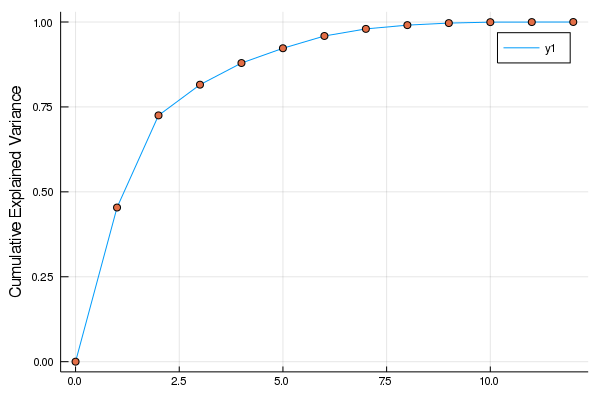

In [9]:
plot(
    0:length(cumulative_explained_variance),
    [0; cumulative_explained_variance], 
    fmt = :png,
    ylab = "Cumulative Explained Variance"
)
scatter!(
    0:length(cumulative_explained_variance),
    [0; cumulative_explained_variance],
    label = ""
)

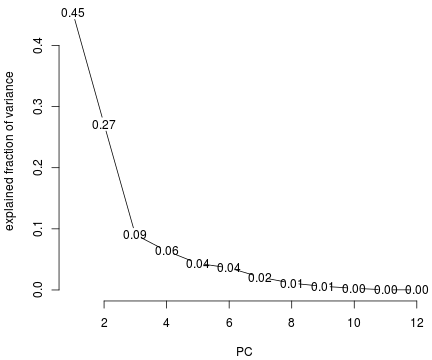

RObject{NilSxp}
NULL


In [10]:
R"""
ev <- $expl_variance

par(mar = c(4, 4, 0, 0) + 0.1)
plot(seq_along(ev), ev, type = "c", ylab = "explained fraction of variance", xlab = "PC", bty = "n")
text(seq_along(ev), ev, sprintf("%.2f", ev))
#abline(h = 0.05)
"""

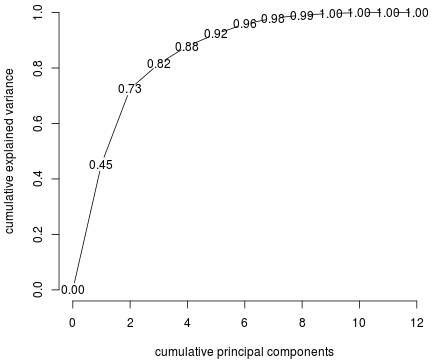

RObject{NilSxp}
NULL


In [11]:
R"""
par(mar = c(4, 4, 0, 0) + 0.1)
cev <- c(0, $cumulative_explained_variance)
cpc <- seq_along(cev) - 1
plot(cpc, cev, type = "c", 
     xlab = "cumulative principal components", 
     ylab = "cumulative explained variance",
     pch = as.character(seq_along(cev) - 1),
     bty = "n")
text(cpc, cev, sprintf("%0.2f", cev))
"""

In [12]:
pca_rotation_matrix = cube_pca |> projection

12×12 Array{Float64,2}:
 -0.259171   -0.311915      0.521494   …   0.648632     -0.305313  
  0.368886   -0.0247538     0.10074       -0.000917575  -0.00118109
  0.0848955  -0.459536     -0.054341      -0.00158746    0.00161772
  0.283665   -0.103394     -0.176898      -0.00148235    0.00012831
  0.407771   -0.0011546     0.232871      -0.332656     -0.716355  
  0.381919    0.0850915     0.198345   …   0.0155059    -0.00194544
 -0.357909   -0.0144746    -0.366862      -0.106099     -0.259829  
  0.133771   -0.43865      -0.269361      -0.00657618    0.00799683
  0.0200644   0.422768      0.0670481      0.0240624    -0.0268837 
  0.147244   -0.45933      -0.25267        0.0103597    -0.00968856
  0.403872    0.000128606   0.151411   …   0.242506      0.488559  
 -0.25642    -0.301082      0.540069      -0.630535      0.29416   

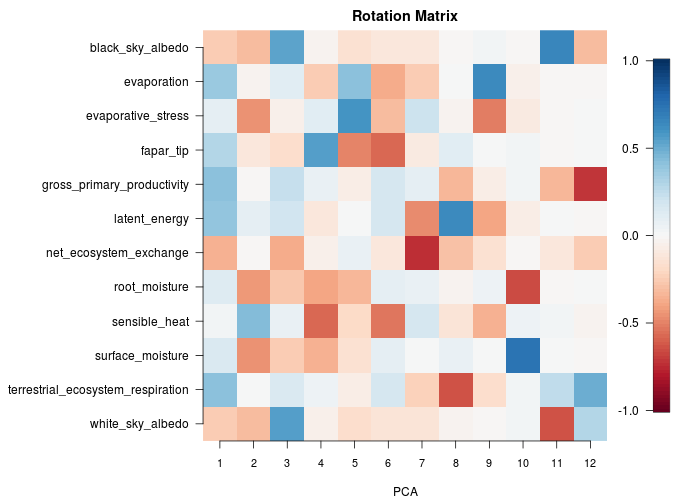

In [13]:
R"""
rot <- $(rotr90(pca_rotation_matrix))
vars <- $(vars)
n <- dim(rot)[1]
ll <- c(-1, 1) # this line makes the color bar much nicer!!

pal <- brewer.pal(11, "RdBu")
pal <- colorRampPalette(colors = pal)(100)

options(device = function(filename=getOption('rcalljl_filename'),...) png(filename, width = 700, height = 500, ...))

layout(matrix(1:2, ncol = 2), widths = c(1, 0.15))
par(mar = c(4, 14, 2, 0) + 0.1)

image(rot, axes = FALSE, main = "Rotation Matrix", zlim = ll, col = pal, xlab = "PCA")
axis(1, at = seq(0, 1, length.out = n), labels = seq(n), las = 1, cex.axis = 0.9)
axis(2, at = seq(0, 1, length.out = n), labels = rev(vars), las = 2, cex.axis = 1)

par(mar = c(4, 1, 2, 0) + 2.1)

image(x = 1, y = seq(ll[1], ll[2], length.out = length(pal)),
      z = matrix(seq(ll[1], ll[2], length.out = length(pal)), nrow = 1), 
      col = pal, xaxt = "n", xlab = NA, xaxs = "r", ylab = NA, las = 2)
""";

In [19]:
R"""
pdf($(joinpath(fig_path, "pca.pdf")), width = 8.5, height = 4)
wdth <- c(0.8, 1/1.15, 0.13/1.15)
layout(t(1:3), widths = wdth)

ev <- $expl_variance
ev2 <- ev[1:10]

par(mar = c(4, 4.2, 0, 0) + 0.1)
plot(seq_along(ev2), ev2, xlim = c(1, length(ev)), 
           type = "b", ylab = "Explained Fraction of Variance", xlab = "PC", 
           bty = "n", las = 1, pch = 16, cex.lab = 1.6)
text(seq_along(ev2), ev2, sprintf("%.2f", ev2), adj = c(-0.2, -0.1))
grid.text("(a)", x = unit(0, "npc"), y = unit(1, "npc"),
          just = c("left", "top"))

#abline(h = 0.05)

rot <- $(rotr90(pca_rotation_matrix))
vars <- c(
    "Black Sky Albedo",
    "Evaporation",
    "Evaporative Stress",
    "FAPAR",
    "GPP",
    "LE",
    "NEE",
    "Root Moisture",
    "Sensible Heat",
    "Surface Moisture",
    "Ecosystem Respiration",
    "White Sky Albedo"
)

clamp <- function(x, lims) {
    lo <- lims[1]
    hi <- lims[2]
    res <- x
    res[res < lo] <- lo
    res[res > hi] <- hi
    return(res)
}

#vars <- $(vars)
n <- dim(rot)[1]
max_load <- max(abs(range(rot)))
print(max_load)
ll <- c(-max_load, max_load) # this line makes the color bar much nicer!!

pal <- brewer.pal(11, "RdBu")
pal <- colorRampPalette(colors = pal)(100)

par(mar = c(4, 5, 0, 0) + 0.1)

image(clamp(rot, ll), axes = FALSE, zlim = ll, col = pal, xlab = "PC", useRaster = TRUE, cex.lab = 1.6)
axis(1, at = seq(0, 1, length.out = n), labels = seq(n), las = 1, cex.axis = 1)
axis(2, at = seq(0, 1, length.out = n), labels = rev(vars), las = 2, cex.axis = 1)
grid.text("(b)", x = unit(0.38, "npc"), y = unit(1, "npc"),
          just = c("left", "top"))

par(mar = c(5, 3, 2, 0) + 0.1)

image(x = 1, y = seq(ll[1], ll[2], length.out = length(pal)),
      z = matrix(seq(ll[1], ll[2], length.out = length(pal)), nrow = 1), 
      col = pal, xaxt = "n", xlab = NA, xaxs = "r", ylab = NA, las = 2,
      bty = "n", useRaster = TRUE)

dev.off()
"""

show_pdf(
    "https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/pca.pdf",
    width = 900, 
    height = 500
)

[1] 0.7386627


(object { attributes=Dict(:type=>"application/pdf",:height=>"500",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/pca.pdf",:width=>"900") }
  "pdf not found")

In [29]:
R"""
range(rot[1:3,])
"""

RObject{RealSxp}
[1] -0.4595364  0.5400685


In [30]:
R"""
range(rot)
"""

RObject{RealSxp}
[1] -0.7337597  0.7386627


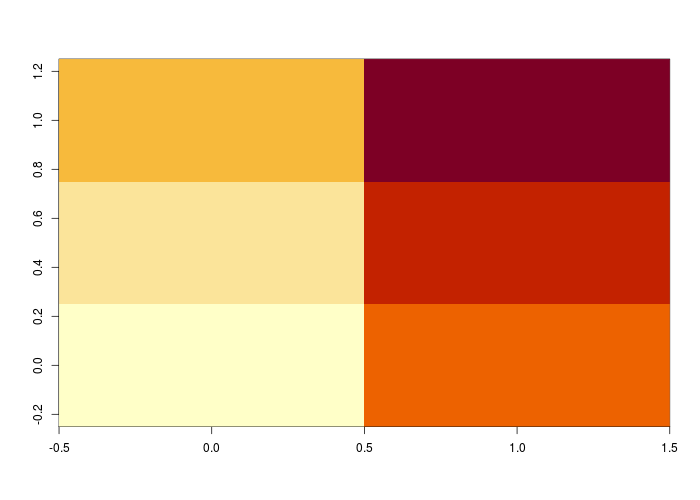

┌ Warning: RCall.jl: Warning in plot.window(...) : "byRow" is not a graphical parameter
│ Warning in plot.xy(xy, type, ...) :
│   "byRow" is not a graphical parameter
│ Warning in axis(side = side, at = at, labels = labels, ...) :
│   "byRow" is not a graphical parameter
│ Warning in axis(side = side, at = at, labels = labels, ...) :
│   "byRow" is not a graphical parameter
│ Warning in box(...) : "byRow" is not a graphical parameter
│ Warning in title(...) : "byRow" is not a graphical parameter
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113


RObject{NilSxp}
NULL


In [26]:
R"""
image(
matrix(c(1, 2, 3,
               4, 5, 6), nrow = 2, byrow = TRUE), 
byRow = TRUE)
"""

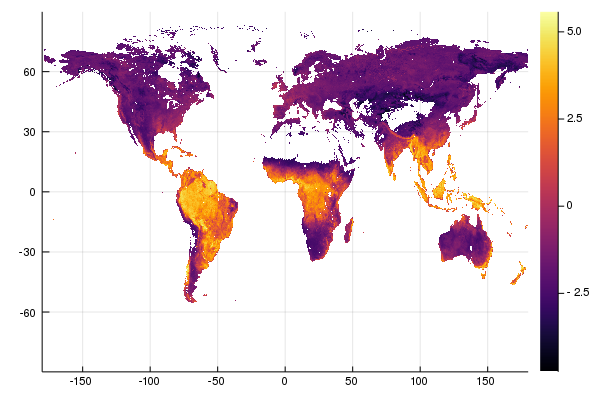

GKS: invalid bitmap size


In [10]:
heatmap(
    getAxis(LonAxis, cube_pca_online).values,
    getAxis(LatAxis, cube_pca_online).values,
    cube_pca_online[1, :, :, 500] |> 
    x -> convert(Array{Union{Float32, Missing}}, x) |> 
    missing_to_nan |> drop_size_one_dims |> rotl90,
    fmt = :png
)

In [11]:
pca_no_msc_cube |> plotMAP

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["Time"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>506,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
253, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2001-01-01\",\"2001-01-09\",\"2001-01-17\",\"2001-01-25\",\"2001-02-02\",\"2001-02-10\",\"2001-02-18\",\"2001-02-26\",\"2001-03-06\",\"2001-03-14\",\"2001-03-22\",\"2001-03-30\",\"2001-04-07\",\"2001-04-15\",\"2001-04-23\",\"2001-05-01\",\"2001-05-09\",\"2001-05-17\",\"2001-05-25\",\"2001-06-02\",\"2001-06-10\",\"2001-06-18\",\"2001-06-26\",\"2001-07-04\",\"2001-07-12\",\"200

In [12]:
pca_msc_cube |> plotMAP

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["MSC"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>46,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
23, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1900-01-01\",\"1900-01-09\",\"1900-01-17\",\"1900-01-25\",\"1900-02-02\",\"1900-02-10\",\"1900-02-18\",\"1900-02-26\",\"1900-03-06\",\"1900-03-14\",\"1900-03-22\",\"1900-03-30\",\"1900-04-07\",\"1900-04-15\",\"1900-04-23\",\"1900-05-01\",\"1900-05-09\",\"1900-05-17\",\"1900-05-25\",\"1900-06-02\",\"1900-06-10\",\"1900-06-18\",\"1900-06-26\",\"1900-07-04\",\"1900-07-12\",\"1900-0

In [13]:
cube_extrema_msc[:, :]

UndefVarError: UndefVarError: cube_extrema_msc not defined

In [14]:
cube_extrema_no_msc[:, :]

UndefVarError: UndefVarError: cube_extrema_no_msc not defined

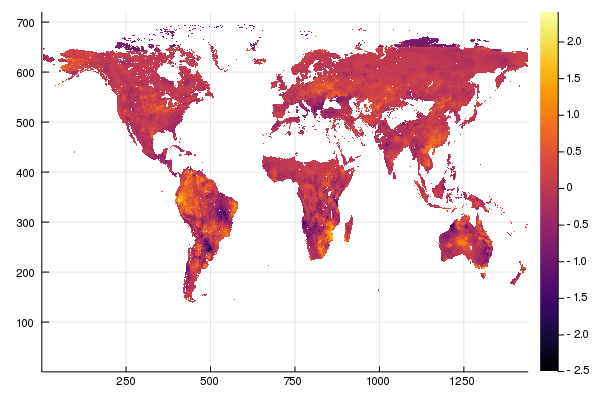

GKS: invalid bitmap size


In [15]:
pca_no_msc_cube[47, 1, :, :] |> 
    x -> convert(Array{Union{Float32, Missing}}, x) |> 
    missing_to_nan |> 
    drop_size_one_dims |> 
    rotl90 |> 
    x -> heatmap(x, fmt = :png)

In [16]:
n_seasons = 4
comp = 1
doy_idxs = (length(getAxis(MSCAxis, pca_msc_cube)) ÷ n_seasons) .* (0:n_seasons - 1) .+ 1 |> collect
ex_msc = [
    cube_extrema_msc[:, i] |> 
    x -> abs.(x) |> 
    x -> max(x...) |> 
    x -> (-x, x) 
    for i in 1:size(cube_extrema_msc, 2)
]
ex_no_msc = [
    cube_extrema_no_msc[:, i] |> 
    x -> abs.(x) |>
    x -> max(x...) |> 
    x -> (-x, x) 
    for i in 1:size(cube_extrema_no_msc, 2)
]

UndefVarError: UndefVarError: cube_extrema_msc not defined